In [87]:
import pandas as pd
import seaborn as sns

In [88]:
df=pd.read_csv('diabetes.csv')

In [89]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [90]:
#input data
x= df.drop('Outcome',axis=1)

#output data
y=df['Outcome']

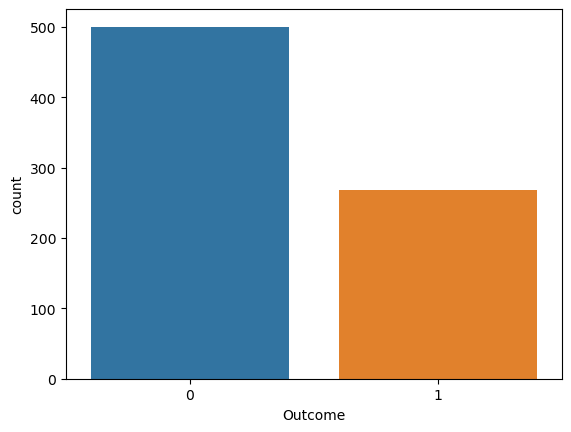

In [91]:
sns.countplot(x=y);

In [92]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [93]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [94]:
#cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)

In [95]:
x.shape

(768, 8)

In [96]:
x_train.shape

(576, 8)

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn=KNeighborsClassifier(n_neighbors=5)

In [115]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=33)

In [100]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [101]:
y_pred = knn.predict(x_test)

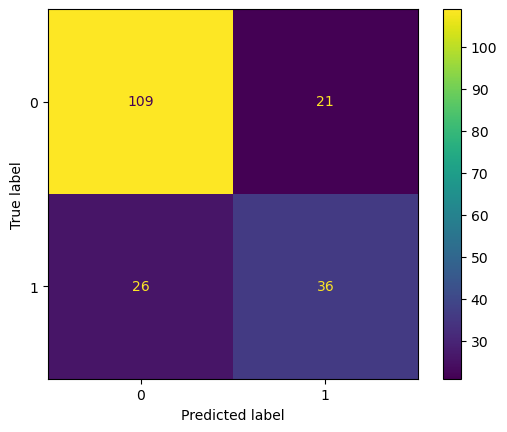

In [102]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       130
           1       0.63      0.58      0.61        62

    accuracy                           0.76       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.75      0.76      0.75       192



In [104]:
import matplotlib.pyplot as plt
import numpy as np

In [105]:

error = []
for k in range (1,41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error.append(np.mean(pred!= y_test))

In [106]:
error

[0.3802083333333333,
 0.28125,
 0.3020833333333333,
 0.234375,
 0.24479166666666666,
 0.23958333333333334,
 0.23958333333333334,
 0.23958333333333334,
 0.22916666666666666,
 0.21875,
 0.234375,
 0.22395833333333334,
 0.21875,
 0.234375,
 0.234375,
 0.22916666666666666,
 0.234375,
 0.24479166666666666,
 0.234375,
 0.24479166666666666,
 0.25,
 0.22916666666666666,
 0.24479166666666666,
 0.25,
 0.25,
 0.2552083333333333,
 0.24479166666666666,
 0.234375,
 0.23958333333333334,
 0.24479166666666666,
 0.23958333333333334,
 0.22916666666666666,
 0.234375,
 0.23958333333333334,
 0.23958333333333334,
 0.24479166666666666,
 0.2552083333333333,
 0.25,
 0.25,
 0.25]

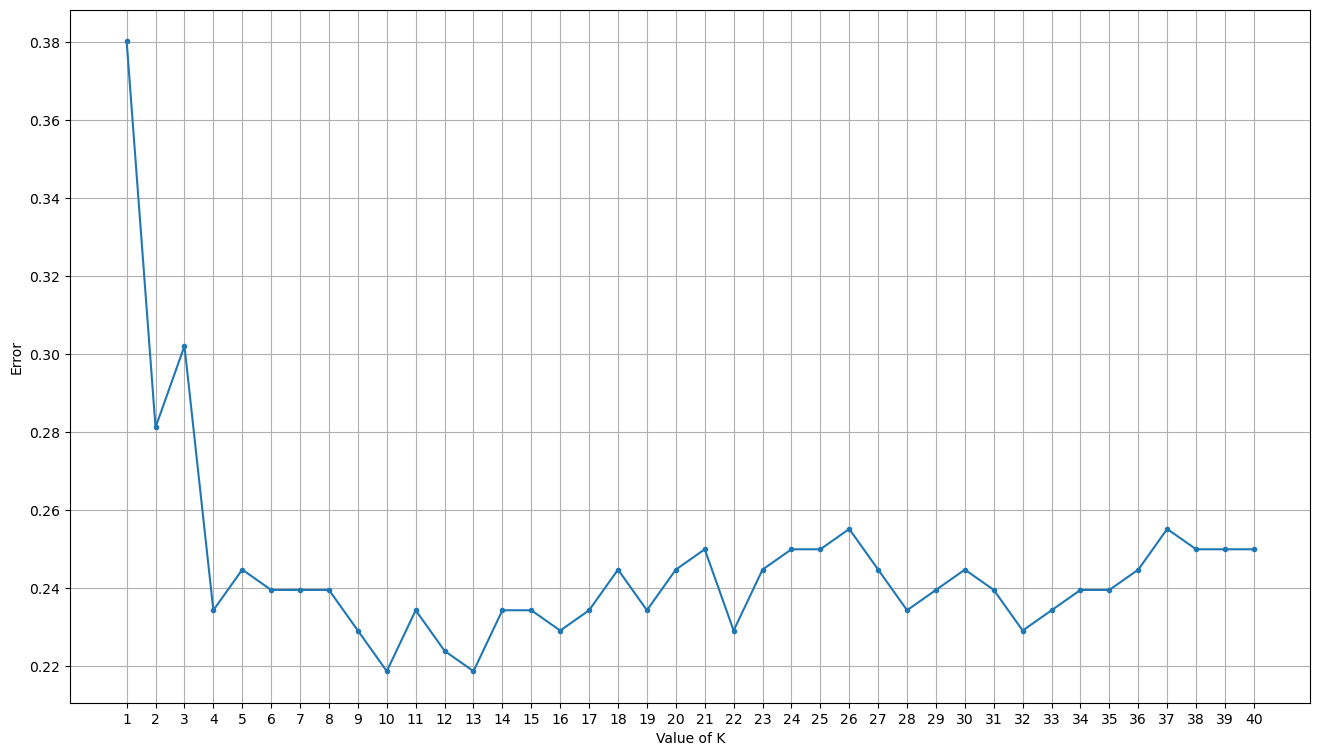

In [107]:
plt.figure(figsize=(16,9))
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41),error,marker='.')

In [108]:
knn = KNeighborsClassifier(n_neighbors=33)

In [109]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=33)

In [112]:
 
y_pred = knn.predict(x_test)


In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       130
           1       0.71      0.47      0.56        62

    accuracy                           0.77       192
   macro avg       0.74      0.69      0.70       192
weighted avg       0.76      0.77      0.75       192

